# 

In [7]:
# Import essential libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations
from sklearn.metrics.pairwise import cosine_similarity  # For computing similarity between vectors
from tqdm import tqdm  # For progress tracking
import ast  # For parsing string representations of lists
import matplotlib.pyplot as plt  # For visualizations


In [8]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\Hemish Savaliya\Downloads\filled_confi_embed.csv')


In [9]:
# Initialize an empty list to hold consolidated data
grouped_data = []

# Group the original DataFrame by 'worker' and 'newsID'
grouped_df = df.groupby(['worker', 'newsID'])

# Iterate through each group (grouped by worker and newsID)
for (worker, newsID), group in grouped_df:
    # Extract the first row of other columns as a dictionary
    # This assumes other columns (besides 'summary' and 'confidence') are identical within the group
    row_data = group.iloc[0].to_dict()
    
    # Create a list of all summaries for the current group
    row_data['summaries'] = group['summary'].tolist()
    
    # Create a list of all confidence values for the current group
    row_data['confidences'] = group['confidence'].tolist()
    
    # Append the consolidated row data for this group
    grouped_data.append(row_data)

# Convert the list of grouped data into a new DataFrame
processed_df = pd.DataFrame(grouped_data)

# Display the first few rows of the processed DataFrame to ensure it looks correct
processed_df.head()


,worker,confidence,newsID,category,Article,Headline,summary,summaries,confidences
0,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,9.0,t3_10rvhi,dating_advice,"[0.0543454, -0.4970314, 0.17185524, -0.1072182...","[0.10235964, 0.21382158, -0.014954604, -0.2458...","[0.170301706, 0.0453425348, 0.102941178, 0.076...","[[0.170301706, 0.0453425348, 0.102941178, 0.07...","[9.0, 1.0, 1.0]"
1,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,9.0,t3_10uftj,relationships,"[-0.014064573, -0.167755, 0.16117042, -0.49832...","[0.11433446, 0.31888837, -0.13898784, -0.15039...","[0.156913385, 0.0862427577, -0.0251766555, -0....","[[0.156913385, 0.0862427577, -0.0251766555, -0...","[9.0, 9.0, 9.0]"
2,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,9.0,t3_113ik9,relationship_advice,"[0.05676625, -0.19642773, 0.07267301, -0.25904...","[0.1758305, 0.12554233, 0.038491145, -0.215823...","[-0.00381168094, 0.0393126421, 0.0908965543, -...","[[-0.00381168094, 0.0393126421, 0.0908965543, ...","[9.0, 9.0, 1.0, 1.0, 3.0, 1.0]"
3,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,8.0,t3_115df2,relationships,"[0.41245335, -0.30367818, -0.067974485, -0.335...","[-0.3248741, -0.14915904, 0.19451687, 0.149458...","[0.17010583, -0.0958794057, -0.038400121, 0.05...","[[0.17010583, -0.0958794057, -0.038400121, 0.0...","[8.0, 9.0, 7.0, 9.0, 8.0, 9.0]"
4,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,7.0,t3_1199u9,AskReddit,"[0.13089877, -0.048571568, 0.016872503, -0.633...","[-0.028262995, -0.106358856, -0.00023370981, -...","[0.331363082, -0.0192483403, 0.0166618247, 0.0...","[[0.331363082, -0.0192483403, 0.0166618247, 0....","[7.0, 8.0, 9.0, 9.0, 6.0, 1.0, 1.0, 2.0, 1.0]"


In [10]:
# Initialize an empty list to hold consolidated data for each worker
final_grouped_data = []

# Group the intermediate DataFrame by 'worker'
final_grouped_df = processed_df.groupby('worker')

# Iterate through each group (grouped by worker)
for worker, group in final_grouped_df:
    # Create a dictionary to consolidate all worker-specific data
    worker_data = {
        'worker': worker,                                # Worker ID
        'newsIDs': group['newsID'].tolist(),            # List of all newsIDs associated with the worker
        'categories': group['category'].tolist(),       # List of categories for each newsID
        'articles': group['Article'].tolist(),          # List of article embeddings for each newsID
        'headlines': group['Headline'].tolist(),        # List of headline embeddings for each newsID
        'summaries': group['summaries'].tolist(),       # List of all summaries (nested lists) for each newsID
        'confidences': group['confidences'].tolist()    # List of all confidence scores (nested lists) for each newsID
    }
    # Append the consolidated data for this worker
    final_grouped_data.append(worker_data)

# Convert the consolidated list into a new DataFrame, where each row corresponds to one worker
final_worker_df = pd.DataFrame(final_grouped_data)

# Display the first few rows of the final worker DataFrame to validate the structure
final_worker_df.head()


,worker,newsIDs,categories,articles,headlines,summaries,confidences
0,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,"[t3_10rvhi, t3_10uftj, t3_113ik9, t3_115df2, t...","[dating_advice, relationships, relationship_ad...","[[0.0543454, -0.4970314, 0.17185524, -0.107218...","[[0.10235964, 0.21382158, -0.014954604, -0.245...","[[[0.170301706, 0.0453425348, 0.102941178, 0.0...","[[9.0, 1.0, 1.0], [9.0, 9.0, 9.0], [9.0, 9.0, ..."
1,43gHDyCi222pTzozK8X47V7YdLit7P,"[t3_10rz2c, t3_12a7za, t3_14bpbp, t3_19zkjr, t...","[AskReddit, relationships, relationships, rela...","[[0.31268737, -0.06809023, 0.095819116, -0.485...","[[-0.12901211, 0.20047808, -0.18640378, -0.192...","[[[0.283659399, 0.0524826236, 0.0609772988, 0....","[[4.0, 2.0, 2.0], [9.0, 9.0, 3.0], [6.0, 7.0, ..."
2,44Z8ttpKcY6Kr1sNymNnBA0nL0h4dZ,"[t3_10de6c, t3_17nvxc, t3_187d6t, t3_1cg7mv, t...","[AskReddit, dating_advice, personalfinance, ca...","[[0.22799698, -0.25885946, 0.13805507, -0.3634...","[[0.23996437, -0.16815588, -0.20878622, -0.090...","[[[0.138307303, 0.127825871, 0.00214692554, -0...","[[8.0, 7.0, 6.0, 8.0, 2.0, 3.0], [6.0, 6.0, 7...."
3,4voZkkCJyOCnpQ5f8WFf5unLW1dSjC,"[t3_11s7no, t3_11scje, t3_19b8cq, t3_19zkjr, t...","[AskReddit, relationships, loseit, relationshi...","[[0.19237654, -0.26764306, -0.5479225, -0.0658...","[[-0.050958224, 0.30015188, -0.36667973, 0.096...","[[[-0.145710692, 0.102887958, -0.126478434, -0...","[[7.0, 3.0, 3.0, 3.0, 4.0, 2.0], [7.0, 3.0, 3...."
4,6TDC3rcGcujIOhfdq3356VhN4NzveC,"[t3_12yk7r, t3_13cdkb, t3_1gi82v, t3_1krnth, t...","[relationship_advice, AskReddit, relationships...","[[0.1102757, -0.29101285, 0.0122604, -0.718882...","[[0.06023529, -0.06658846, -0.12719944, -0.185...","[[[0.286518037, 0.186374411, -0.102303401, -0....","[[7.0, 7.0, 7.0, 7.0, 7.0, 3.0], [9.0, 9.0, 7...."


In [11]:
final_worker_df['categories']

0     [dating_advice, relationships, relationship_ad...
1     [AskReddit, relationships, relationships, rela...
2     [AskReddit, dating_advice, personalfinance, ca...
3     [AskReddit, relationships, loseit, relationshi...
4     [relationship_advice, AskReddit, relationships...
                            ...                        
71    [AskReddit, relationships, relationships, lose...
72    [BreakUps, dating_advice, relationships, AskRe...
73    [AskReddit, relationship_advice, relationship_...
74    [AskReddit, relationships, AskReddit, relation...
75    [relationships, AskReddit, personalfinance, re...
Name: categories, Length: 76, dtype: object

In [12]:
# Import required libraries
from sentence_transformers import SentenceTransformer  # For generating text embeddings

# Load the pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')  
# 'all-MiniLM-L6-v2' is a lightweight, efficient model for tasks like text similarity and categorization.

# Define a function to encode a list of categories into a single embedding
# Update encoding logic to encode each category in the list separately
def encode_category_list(category_list):
    """
    Encodes a list of categories into a list of embeddings.
    """
    if not category_list:  # Handle empty lists
        return []
    embeddings = model.encode(category_list, convert_to_tensor=False)
    return embeddings  # Return a list of embeddings

# Apply the updated encoding logic
tqdm.pandas(desc="Encoding categories")


In [13]:
# Apply the encoding function to the 'categories' column in the DataFrame
# Store the resulting embeddings in a new column 'category_embedding'
final_worker_df['category_embedding'] = final_worker_df['categories'].progress_apply(encode_category_list)

Encoding categories: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 76/76 [00:46<00:00,  1.63it/s]


In [14]:
print(final_worker_df['category_embedding'].iloc[0])

[[-0.0464385  -0.00356434  0.04266824 ... -0.06793341  0.04026423
   0.03649572]
 [-0.04496208  0.0569494  -0.02975992 ... -0.00240951  0.04534061
  -0.00649848]
 [-0.05107098  0.00748391 -0.00946801 ... -0.02895087 -0.00204041
   0.03334919]
 ...
 [-0.012141   -0.02558097 -0.00017224 ... -0.01163565 -0.02196422
   0.04058874]
 [-0.04496214  0.05694946 -0.0297599  ... -0.00240948  0.04534058
  -0.00649847]
 [-0.04496214  0.05694946 -0.0297599  ... -0.00240948  0.04534058
  -0.00649847]]


In [15]:

# Verify the length of each embedding matches the number of categories
final_worker_df['embedding_length_check'] = final_worker_df.apply(lambda row: len(row['category_embedding']) == len(row['categories']),axis=1)

# Check for any mismatches
print(final_worker_df[~final_worker_df['embedding_length_check']])


Empty DataFrame
Columns: [worker, newsIDs, categories, articles, headlines, summaries, confidences, category_embedding, embedding_length_check]
Index: []


In [16]:
final_worker_df

,worker,newsIDs,categories,articles,headlines,summaries,confidences,category_embedding,embedding_length_check
0,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,"[t3_10rvhi, t3_10uftj, t3_113ik9, t3_115df2, t...","[dating_advice, relationships, relationship_ad...","[[0.0543454, -0.4970314, 0.17185524, -0.107218...","[[0.10235964, 0.21382158, -0.014954604, -0.245...","[[[0.170301706, 0.0453425348, 0.102941178, 0.0...","[[9.0, 1.0, 1.0], [9.0, 9.0, 9.0], [9.0, 9.0, ...","[[-0.046438504, -0.0035643377, 0.04266824, 0.0...",True
1,43gHDyCi222pTzozK8X47V7YdLit7P,"[t3_10rz2c, t3_12a7za, t3_14bpbp, t3_19zkjr, t...","[AskReddit, relationships, relationships, rela...","[[0.31268737, -0.06809023, 0.095819116, -0.485...","[[-0.12901211, 0.20047808, -0.18640378, -0.192...","[[[0.283659399, 0.0524826236, 0.0609772988, 0....","[[4.0, 2.0, 2.0], [9.0, 9.0, 3.0], [6.0, 7.0, ...","[[-0.012141003, -0.025580969, -0.00017224121, ...",True
2,44Z8ttpKcY6Kr1sNymNnBA0nL0h4dZ,"[t3_10de6c, t3_17nvxc, t3_187d6t, t3_1cg7mv, t...","[AskReddit, dating_advice, personalfinance, ca...","[[0.22799698, -0.25885946, 0.13805507, -0.3634...","[[0.23996437, -0.16815588, -0.20878622, -0.090...","[[[0.138307303, 0.127825871, 0.00214692554, -0...","[[8.0, 7.0, 6.0, 8.0, 2.0, 3.0], [6.0, 6.0, 7....","[[-0.012141003, -0.025580969, -0.00017224121, ...",True
3,4voZkkCJyOCnpQ5f8WFf5unLW1dSjC,"[t3_11s7no, t3_11scje, t3_19b8cq, t3_19zkjr, t...","[AskReddit, relationships, loseit, relationshi...","[[0.19237654, -0.26764306, -0.5479225, -0.0658...","[[-0.050958224, 0.30015188, -0.36667973, 0.096...","[[[-0.145710692, 0.102887958, -0.126478434, -0...","[[7.0, 3.0, 3.0, 3.0, 4.0, 2.0], [7.0, 3.0, 3....","[[-0.012141003, -0.025580969, -0.00017224121, ...",True
4,6TDC3rcGcujIOhfdq3356VhN4NzveC,"[t3_12yk7r, t3_13cdkb, t3_1gi82v, t3_1krnth, t...","[relationship_advice, AskReddit, relationships...","[[0.1102757, -0.29101285, 0.0122604, -0.718882...","[[0.06023529, -0.06658846, -0.12719944, -0.185...","[[[0.286518037, 0.186374411, -0.102303401, -0....","[[7.0, 7.0, 7.0, 7.0, 7.0, 3.0], [9.0, 9.0, 7....","[[-0.051070984, 0.007483907, -0.009468005, 0.0...",True
...,...,...,...,...,...,...,...,...,...
71,thott7XepukYSbOL2QgSlyXd0rgHvr,"[t3_10x2g2, t3_115svb, t3_11p137, t3_11t5ud, t...","[AskReddit, relationships, relationships, lose...","[[0.33980593, -0.4875494, 0.08624365, -0.42616...","[[0.273832, 0.26154062, -0.27481478, -0.431350...","[[[0.116243839, -0.046494931, 0.0769849196, 0....","[[6.0, 8.0, 3.0], [9.0, 8.0, 9.0, 8.0, 3.0, 4....","[[-0.012141003, -0.025580969, -0.00017224121, ...",True
72,uvzut5OK2bvei9zoCDdktcfLENYioY,"[t3_1040de, t3_105yq6, t3_10alck, t3_10rii2, t...","[BreakUps, dating_advice, relationships, AskRe...","[[0.08637281, -0.12240156, -0.13820627, 0.0013...","[[0.030420735, 0.14545289, 0.077915825, -0.135...","[[[0.00424040388, 0.0265972782, 0.0298489016, ...","[[8.0, 9.0, 7.0, 1.0, 2.0, 3.0], [7.0, 7.0, 7....","[[-0.07454614, -0.061678514, 0.0679709, 0.1061...",True
73,xi08swIGmcCZN2ilc6d965nLllqj3j,"[t3_12c581, t3_12w9bo, t3_13p7nf, t3_14j3vr, t...","[AskReddit, relationship_advice, relationship_...","[[0.6062012, -0.09252578, 0.26007563, -0.40058...","[[-0.038824286, -0.44812912, 0.026372172, -0.4...","[[[0.284653187, 0.173521027, 0.196024165, -0.0...","[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [...","[[-0.012141003, -0.025580969, -0.00017224121, ...",True
74,ySuwNVhLQZoFIBThlVInjIulcsq9yf,"[t3_10129b, t3_10a45d, t3_10yscv, t3_11yyrk, t...","[AskReddit, relationships, AskReddit, relation...","[[0.062008668, -0.29763365, -0.018675134, -0.1...","[[0.2815708, 0.09051861, -0.23261276, 0.046341...","[[[0.175076112, 0.0376416296, -0.0921007916, 0...","[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, ...","[[-0.012141003, -0.025580969, -0.00017224121, ...",True


In [18]:
def parse_embedding_list(embedding_list):
    # Parse a list of embeddings from string format to numeric arrays
    parsed_list = []
    for embedding in embedding_list:
        try:
            # Convert the string representation of an embedding into a NumPy array
            parsed_list.append(np.array(ast.literal_eval(embedding), dtype=float))
        except (ValueError, SyntaxError) as e:
            # Handle errors during parsing and print a warning
            print(f"Error parsing embedding: {embedding} - {e}")
            # Append None for embeddings that couldn't be parsed
            parsed_list.append(None)
    return parsed_list


In [19]:
# Enable progress bars for DataFrame operations
tqdm.pandas(desc="Parsing embeddings")

# Parse embeddings for the 'articles' column
final_worker_df['articles'] = final_worker_df['articles'].progress_apply(parse_embedding_list)

# Parse embeddings for the 'headlines' column
final_worker_df['headlines'] = final_worker_df['headlines'].progress_apply(parse_embedding_list)

# Parse embeddings for the 'summaries' column
# Handle nested lists of embeddings (list of lists) by applying the helper function to each sub-list
final_worker_df['summaries'] = final_worker_df['summaries'].progress_apply(
    lambda summaries: [parse_embedding_list(summary) for summary in summaries]
)


Parsing embeddings: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 76/76 [09:54<00:00,  7.83s/it]


In [20]:
final_worker_df

,worker,newsIDs,categories,articles,headlines,summaries,confidences,category_embedding,embedding_length_check
0,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,"[t3_10rvhi, t3_10uftj, t3_113ik9, t3_115df2, t...","[dating_advice, relationships, relationship_ad...","[[0.0543454, -0.4970314, 0.17185524, -0.107218...","[[0.10235964, 0.21382158, -0.014954604, -0.245...","[[[0.170301706, 0.0453425348, 0.102941178, 0.0...","[[9.0, 1.0, 1.0], [9.0, 9.0, 9.0], [9.0, 9.0, ...","[[-0.046438504, -0.0035643377, 0.04266824, 0.0...",True
1,43gHDyCi222pTzozK8X47V7YdLit7P,"[t3_10rz2c, t3_12a7za, t3_14bpbp, t3_19zkjr, t...","[AskReddit, relationships, relationships, rela...","[[0.31268737, -0.06809023, 0.095819116, -0.485...","[[-0.12901211, 0.20047808, -0.18640378, -0.192...","[[[0.283659399, 0.0524826236, 0.0609772988, 0....","[[4.0, 2.0, 2.0], [9.0, 9.0, 3.0], [6.0, 7.0, ...","[[-0.012141003, -0.025580969, -0.00017224121, ...",True
2,44Z8ttpKcY6Kr1sNymNnBA0nL0h4dZ,"[t3_10de6c, t3_17nvxc, t3_187d6t, t3_1cg7mv, t...","[AskReddit, dating_advice, personalfinance, ca...","[[0.22799698, -0.25885946, 0.13805507, -0.3634...","[[0.23996437, -0.16815588, -0.20878622, -0.090...","[[[0.138307303, 0.127825871, 0.00214692554, -0...","[[8.0, 7.0, 6.0, 8.0, 2.0, 3.0], [6.0, 6.0, 7....","[[-0.012141003, -0.025580969, -0.00017224121, ...",True
3,4voZkkCJyOCnpQ5f8WFf5unLW1dSjC,"[t3_11s7no, t3_11scje, t3_19b8cq, t3_19zkjr, t...","[AskReddit, relationships, loseit, relationshi...","[[0.19237654, -0.26764306, -0.5479225, -0.0658...","[[-0.050958224, 0.30015188, -0.36667973, 0.096...","[[[-0.145710692, 0.102887958, -0.126478434, -0...","[[7.0, 3.0, 3.0, 3.0, 4.0, 2.0], [7.0, 3.0, 3....","[[-0.012141003, -0.025580969, -0.00017224121, ...",True
4,6TDC3rcGcujIOhfdq3356VhN4NzveC,"[t3_12yk7r, t3_13cdkb, t3_1gi82v, t3_1krnth, t...","[relationship_advice, AskReddit, relationships...","[[0.1102757, -0.29101285, 0.0122604, -0.718882...","[[0.06023529, -0.06658846, -0.12719944, -0.185...","[[[0.286518037, 0.186374411, -0.102303401, -0....","[[7.0, 7.0, 7.0, 7.0, 7.0, 3.0], [9.0, 9.0, 7....","[[-0.051070984, 0.007483907, -0.009468005, 0.0...",True
...,...,...,...,...,...,...,...,...,...
71,thott7XepukYSbOL2QgSlyXd0rgHvr,"[t3_10x2g2, t3_115svb, t3_11p137, t3_11t5ud, t...","[AskReddit, relationships, relationships, lose...","[[0.33980593, -0.4875494, 0.08624365, -0.42616...","[[0.273832, 0.26154062, -0.27481478, -0.431350...","[[[0.116243839, -0.046494931, 0.0769849196, 0....","[[6.0, 8.0, 3.0], [9.0, 8.0, 9.0, 8.0, 3.0, 4....","[[-0.012141003, -0.025580969, -0.00017224121, ...",True
72,uvzut5OK2bvei9zoCDdktcfLENYioY,"[t3_1040de, t3_105yq6, t3_10alck, t3_10rii2, t...","[BreakUps, dating_advice, relationships, AskRe...","[[0.08637281, -0.12240156, -0.13820627, 0.0013...","[[0.030420735, 0.14545289, 0.077915825, -0.135...","[[[0.00424040388, 0.0265972782, 0.0298489016, ...","[[8.0, 9.0, 7.0, 1.0, 2.0, 3.0], [7.0, 7.0, 7....","[[-0.07454614, -0.061678514, 0.0679709, 0.1061...",True
73,xi08swIGmcCZN2ilc6d965nLllqj3j,"[t3_12c581, t3_12w9bo, t3_13p7nf, t3_14j3vr, t...","[AskReddit, relationship_advice, relationship_...","[[0.6062012, -0.09252578, 0.26007563, -0.40058...","[[-0.038824286, -0.44812912, 0.026372172, -0.4...","[[[0.284653187, 0.173521027, 0.196024165, -0.0...","[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [...","[[-0.012141003, -0.025580969, -0.00017224121, ...",True
74,ySuwNVhLQZoFIBThlVInjIulcsq9yf,"[t3_10129b, t3_10a45d, t3_10yscv, t3_11yyrk, t...","[AskReddit, relationships, AskReddit, relation...","[[0.062008668, -0.29763365, -0.018675134, -0.1...","[[0.2815708, 0.09051861, -0.23261276, 0.046341...","[[[0.175076112, 0.0376416296, -0.0921007916, 0...","[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, ...","[[-0.012141003, -0.025580969, -0.00017224121, ...",True


In [21]:
# Display a sample of category embeddings
print(final_worker_df[['categories', 'category_embedding']].head())

# Verify the length of each embedding matches the number of categories
final_worker_df['embedding_length_check'] = final_worker_df.apply(
    lambda row: len(row['category_embedding']) == len(row['categories']),
    axis=1
)

# Check for any mismatches
print(final_worker_df[~final_worker_df['embedding_length_check']])


                                          categories  \
0  [dating_advice, relationships, relationship_ad...   
1  [AskReddit, relationships, relationships, rela...   
2  [AskReddit, dating_advice, personalfinance, ca...   
3  [AskReddit, relationships, loseit, relationshi...   
4  [relationship_advice, AskReddit, relationships...   

                                  category_embedding  
0  [[-0.046438504, -0.0035643377, 0.04266824, 0.0...  
1  [[-0.012141003, -0.025580969, -0.00017224121, ...  
2  [[-0.012141003, -0.025580969, -0.00017224121, ...  
3  [[-0.012141003, -0.025580969, -0.00017224121, ...  
4  [[-0.051070984, 0.007483907, -0.009468005, 0.0...  
Empty DataFrame
Columns: [worker, newsIDs, categories, articles, headlines, summaries, confidences, category_embedding, embedding_length_check]
Index: []


In [22]:
tqdm.pandas(desc="Preparing diversity computation data")

# Initialize an empty list to store flattened data
flattened_data = []

# Iterate through the rows of the final worker DataFrame
for _, row in tqdm(final_worker_df.iterrows(), total=len(final_worker_df), desc="Flattening worker data"):
    # Extract worker information and their corresponding data
    worker = row['worker']
    newsIDs = row['newsIDs']
    categories = row['category_embedding']
    articles = row['articles']

    # Skip workers with fewer than 2 newsIDs (not enough data for comparisons)
    if len(newsIDs) < 2:
        continue

    # Loop through consecutive newsID pairs for the worker
    for i in range(len(newsIDs) - 1):
        # Append data for each pair to the flattened data list
        flattened_data.append({
            'worker': worker,                        # Worker ID
            'newsID1': newsIDs[i],                   # First newsID in the pair
            'newsID2': newsIDs[i + 1],               # Second newsID in the pair
            'category1': categories[i],      # Category of the first newsID
            'category2': categories[i + 1],  # Category of the second newsID
            'article1': articles[i],                 # Article embedding of the first newsID
            'article2': articles[i + 1]              # Article embedding of the second newsID
        })

# Convert the flattened data list into a DataFrame
diversity_input_df = pd.DataFrame(flattened_data)

# Display the first few rows of the flattened DataFrame for validation
diversity_input_df.head()


Flattening worker data: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 1279.66it/s]


,worker,newsID1,newsID2,category1,category2,article1,article2
0,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_10rvhi,t3_10uftj,"[-0.046438504, -0.0035643377, 0.04266824, 0.04...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.0543454, -0.4970314, 0.17185524, -0.1072182...","[-0.014064573, -0.167755, 0.16117042, -0.49832..."
1,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_10uftj,t3_113ik9,"[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[-0.051070984, 0.007483907, -0.009468005, 0.03...","[-0.014064573, -0.167755, 0.16117042, -0.49832...","[0.05676625, -0.19642773, 0.07267301, -0.25904..."
2,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_113ik9,t3_115df2,"[-0.051070984, 0.007483907, -0.009468005, 0.03...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.05676625, -0.19642773, 0.07267301, -0.25904...","[0.41245335, -0.30367818, -0.067974485, -0.335..."
3,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_115df2,t3_1199u9,"[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[-0.012141003, -0.025580969, -0.00017224121, 0...","[0.41245335, -0.30367818, -0.067974485, -0.335...","[0.13089877, -0.048571568, 0.016872503, -0.633..."
4,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_1199u9,t3_11fvr8,"[-0.012141003, -0.025580969, -0.00017224121, 0...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.13089877, -0.048571568, 0.016872503, -0.633...","[-0.032541193, -0.57655406, 0.06394987, -0.249..."


In [23]:
diversity_input_df

,worker,newsID1,newsID2,category1,category2,article1,article2
0,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_10rvhi,t3_10uftj,"[-0.046438504, -0.0035643377, 0.04266824, 0.04...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.0543454, -0.4970314, 0.17185524, -0.1072182...","[-0.014064573, -0.167755, 0.16117042, -0.49832..."
1,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_10uftj,t3_113ik9,"[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[-0.051070984, 0.007483907, -0.009468005, 0.03...","[-0.014064573, -0.167755, 0.16117042, -0.49832...","[0.05676625, -0.19642773, 0.07267301, -0.25904..."
2,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_113ik9,t3_115df2,"[-0.051070984, 0.007483907, -0.009468005, 0.03...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.05676625, -0.19642773, 0.07267301, -0.25904...","[0.41245335, -0.30367818, -0.067974485, -0.335..."
3,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_115df2,t3_1199u9,"[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[-0.012141003, -0.025580969, -0.00017224121, 0...","[0.41245335, -0.30367818, -0.067974485, -0.335...","[0.13089877, -0.048571568, 0.016872503, -0.633..."
4,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_1199u9,t3_11fvr8,"[-0.012141003, -0.025580969, -0.00017224121, 0...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.13089877, -0.048571568, 0.016872503, -0.633...","[-0.032541193, -0.57655406, 0.06394987, -0.249..."
...,...,...,...,...,...,...,...
38791,zKV8BFGy60O0q7102ALF84S6Jo5i4q,t3_z4ejr,t3_zbtxf,"[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[-0.046438504, -0.0035643377, 0.04266824, 0.04...","[-0.13640751, -0.29348242, 0.037856426, -0.335...","[-0.004935328, -0.5443118, 0.53256553, -0.3600..."
38792,zKV8BFGy60O0q7102ALF84S6Jo5i4q,t3_zbtxf,t3_zfzlp,"[-0.046438504, -0.0035643377, 0.04266824, 0.04...","[-0.06457156, 0.024547504, 0.022940924, 0.0714...","[-0.004935328, -0.5443118, 0.53256553, -0.3600...","[0.1887211, -0.20208715, -0.22103754, -0.51207..."
38793,zKV8BFGy60O0q7102ALF84S6Jo5i4q,t3_zfzlp,t3_zih0c,"[-0.06457156, 0.024547504, 0.022940924, 0.0714...","[0.003851786, 0.064022265, -0.004539014, 0.078...","[0.1887211, -0.20208715, -0.22103754, -0.51207...","[-0.07305615, -0.5207522, 0.36716652, -0.20973..."
38794,zKV8BFGy60O0q7102ALF84S6Jo5i4q,t3_zih0c,t3_zlgxq,"[0.003851786, 0.064022265, -0.004539014, 0.078...","[-0.012141003, -0.025580969, -0.00017224121, 0...","[-0.07305615, -0.5207522, 0.36716652, -0.20973...","[0.06487371, -0.17381941, 0.30177072, -0.14607..."


In [24]:
def cosine_similarity(vec1, vec2):
    # Handle cases where one or both vectors are None
    if vec1 is None or vec2 is None:
        return 0  # Return 0 similarity if either vector is missing

    # Convert the input vectors to NumPy arrays (ensure float type)
    vec1, vec2 = np.array(vec1, dtype=float), np.array(vec2, dtype=float)

    # Compute the cosine similarity using the dot product and vector norms
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))


In [25]:
# Add a progress bar to track the computation
tqdm.pandas(desc="Computing embedding diversity")

# Calculate cosine similarity between embeddings in 'article1' and 'article2'
diversity_input_df['embedding_similarity'] = diversity_input_df.progress_apply(
    lambda x: cosine_similarity(x['article1'], x['article2']), axis=1
)

# Compute embedding diversity as 1 - similarity
diversity_input_df['embedding_diversity'] = 1 - diversity_input_df['embedding_similarity']

# Display the first few rows of the updated DataFrame for validation
diversity_input_df.head()

Computing embedding diversity: 100%|██████████████████████████████████████████████████████████████████████████████| 38796/38796 [00:00<00:00, 48850.69it/s]


,worker,newsID1,newsID2,category1,category2,article1,article2,embedding_similarity,embedding_diversity
0,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_10rvhi,t3_10uftj,"[-0.046438504, -0.0035643377, 0.04266824, 0.04...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.0543454, -0.4970314, 0.17185524, -0.1072182...","[-0.014064573, -0.167755, 0.16117042, -0.49832...",0.874351,0.125649
1,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_10uftj,t3_113ik9,"[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[-0.051070984, 0.007483907, -0.009468005, 0.03...","[-0.014064573, -0.167755, 0.16117042, -0.49832...","[0.05676625, -0.19642773, 0.07267301, -0.25904...",0.921395,0.078605
2,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_113ik9,t3_115df2,"[-0.051070984, 0.007483907, -0.009468005, 0.03...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.05676625, -0.19642773, 0.07267301, -0.25904...","[0.41245335, -0.30367818, -0.067974485, -0.335...",0.902045,0.097955
3,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_115df2,t3_1199u9,"[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[-0.012141003, -0.025580969, -0.00017224121, 0...","[0.41245335, -0.30367818, -0.067974485, -0.335...","[0.13089877, -0.048571568, 0.016872503, -0.633...",0.883945,0.116055
4,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_1199u9,t3_11fvr8,"[-0.012141003, -0.025580969, -0.00017224121, 0...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.13089877, -0.048571568, 0.016872503, -0.633...","[-0.032541193, -0.57655406, 0.06394987, -0.249...",0.692616,0.307384


In [26]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute cosine similarity for each pair
diversity_input_df['category_similarity'] = diversity_input_df.apply(
    lambda row: cosine_similarity(
        np.array(row['category1']).reshape(1, -1), 
        np.array(row['category2']).reshape(1, -1)
    )[0][0],
    axis=1
)

# Convert similarity to diversity (1 - similarity)
diversity_input_df['category_diversity'] = 1 - diversity_input_df['category_similarity']


In [27]:
diversity_input_df

,worker,newsID1,newsID2,category1,category2,article1,article2,embedding_similarity,embedding_diversity,category_similarity,category_diversity
0,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_10rvhi,t3_10uftj,"[-0.046438504, -0.0035643377, 0.04266824, 0.04...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.0543454, -0.4970314, 0.17185524, -0.1072182...","[-0.014064573, -0.167755, 0.16117042, -0.49832...",0.874351,0.125649,0.496955,0.503045
1,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_10uftj,t3_113ik9,"[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[-0.051070984, 0.007483907, -0.009468005, 0.03...","[-0.014064573, -0.167755, 0.16117042, -0.49832...","[0.05676625, -0.19642773, 0.07267301, -0.25904...",0.921395,0.078605,0.678649,0.321351
2,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_113ik9,t3_115df2,"[-0.051070984, 0.007483907, -0.009468005, 0.03...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.05676625, -0.19642773, 0.07267301, -0.25904...","[0.41245335, -0.30367818, -0.067974485, -0.335...",0.902045,0.097955,0.678649,0.321351
3,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_115df2,t3_1199u9,"[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[-0.012141003, -0.025580969, -0.00017224121, 0...","[0.41245335, -0.30367818, -0.067974485, -0.335...","[0.13089877, -0.048571568, 0.016872503, -0.633...",0.883945,0.116055,0.259165,0.740835
4,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_1199u9,t3_11fvr8,"[-0.012141003, -0.025580969, -0.00017224121, 0...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.13089877, -0.048571568, 0.016872503, -0.633...","[-0.032541193, -0.57655406, 0.06394987, -0.249...",0.692616,0.307384,0.259165,0.740835
...,...,...,...,...,...,...,...,...,...,...,...
38791,zKV8BFGy60O0q7102ALF84S6Jo5i4q,t3_z4ejr,t3_zbtxf,"[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[-0.046438504, -0.0035643377, 0.04266824, 0.04...","[-0.13640751, -0.29348242, 0.037856426, -0.335...","[-0.004935328, -0.5443118, 0.53256553, -0.3600...",0.881542,0.118458,0.496955,0.503045
38792,zKV8BFGy60O0q7102ALF84S6Jo5i4q,t3_zbtxf,t3_zfzlp,"[-0.046438504, -0.0035643377, 0.04266824, 0.04...","[-0.06457156, 0.024547504, 0.022940924, 0.0714...","[-0.004935328, -0.5443118, 0.53256553, -0.3600...","[0.1887211, -0.20208715, -0.22103754, -0.51207...",0.681814,0.318186,0.132467,0.867533
38793,zKV8BFGy60O0q7102ALF84S6Jo5i4q,t3_zfzlp,t3_zih0c,"[-0.06457156, 0.024547504, 0.022940924, 0.0714...","[0.003851786, 0.064022265, -0.004539014, 0.078...","[0.1887211, -0.20208715, -0.22103754, -0.51207...","[-0.07305615, -0.5207522, 0.36716652, -0.20973...",0.799177,0.200823,0.350210,0.649790
38794,zKV8BFGy60O0q7102ALF84S6Jo5i4q,t3_zih0c,t3_zlgxq,"[0.003851786, 0.064022265, -0.004539014, 0.078...","[-0.012141003, -0.025580969, -0.00017224121, 0...","[-0.07305615, -0.5207522, 0.36716652, -0.20973...","[0.06487371, -0.17381941, 0.30177072, -0.14607...",0.812096,0.187904,0.221521,0.778479


In [113]:
# Group by worker and aggregate diversity metrics into lists
worker_diversity_lists = diversity_input_df.groupby('worker').agg({
    'embedding_diversity': list,
    'category_diversity': list,
    'total_diversity': list
}).reset_index()

# Compute variance for each worker
worker_diversity_lists['Embedding Diversity Variance'] = worker_diversity_lists['embedding_diversity'].apply(lambda x: pd.Series(x).var())
worker_diversity_lists['Category Diversity Variance'] = worker_diversity_lists['category_diversity'].apply(lambda x: pd.Series(x).var())
worker_diversity_lists['Overall Diversity Variance'] = worker_diversity_lists['total_diversity'].apply(lambda x: pd.Series(x).var())

# Drop the lists if you no longer need them
worker_diversity_lists = worker_diversity_lists.drop(columns=['embedding_diversity', 'category_diversity', 'total_diversity'])

# Display the resulting DataFrame
print(worker_diversity_lists)

# Save to CSV for further analysis or reporting
worker_diversity_lists.to_csv('Worker_Diversity_Variance.csv', index=False)


                            worker  Embedding Diversity Variance  \
0   3AFaFd3w9NjDGnO51kupLyK1N44DQ2                      0.002892   
1   43gHDyCi222pTzozK8X47V7YdLit7P                      0.003525   
2   44Z8ttpKcY6Kr1sNymNnBA0nL0h4dZ                      0.003080   
3   4voZkkCJyOCnpQ5f8WFf5unLW1dSjC                      0.003147   
4   6TDC3rcGcujIOhfdq3356VhN4NzveC                      0.002722   
..                             ...                           ...   
71  thott7XepukYSbOL2QgSlyXd0rgHvr                      0.002711   
72  uvzut5OK2bvei9zoCDdktcfLENYioY                      0.002596   
73  xi08swIGmcCZN2ilc6d965nLllqj3j                      0.002601   
74  ySuwNVhLQZoFIBThlVInjIulcsq9yf                      0.001892   
75  zKV8BFGy60O0q7102ALF84S6Jo5i4q                      0.002513   

    Category Diversity Variance  Overall Diversity Variance  
0                      0.134805                    0.025088  
1                      0.158413                    0.029461

In [121]:
worker_diversity_lists.head(35)

,worker,Embedding Diversity Variance,Category Diversity Variance,Overall Diversity Variance
0,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,0.002892,0.134805,0.025088
1,43gHDyCi222pTzozK8X47V7YdLit7P,0.003525,0.158413,0.029461
2,44Z8ttpKcY6Kr1sNymNnBA0nL0h4dZ,0.003080,0.146666,0.027162
3,4voZkkCJyOCnpQ5f8WFf5unLW1dSjC,0.003147,0.142725,0.027734
4,6TDC3rcGcujIOhfdq3356VhN4NzveC,0.002722,0.098640,0.016693
5,7FbjqRA85D0kaKh9cHs5BlfTGRQ3gM,0.001976,0.140474,0.024654
6,7ohpEDc6oqdYm2So8i7IrCrArikSRy,0.001662,0.159151,0.029068
7,7rETShtxBTLBtbJKVyfpUYUNJjQAOC,0.002804,0.135840,0.024604
8,9HS4pwiJ58yNGPK9vPujWyDapy5e0k,0.002441,0.120879,0.022385
9,9UQLCFxeYndGNfHEUP3yRt8XZhrrPr,0.003739,0.139458,0.026584


In [28]:
# Compute statistical summaries for embedding and category diversity
diversity_stats = {
    'min_embedding_diversity': diversity_input_df['embedding_diversity'].min(),  # Minimum embedding diversity
    'max_embedding_diversity': diversity_input_df['embedding_diversity'].max(),  # Maximum embedding diversity
    'mean_embedding_diversity': diversity_input_df['embedding_diversity'].mean(),  # Mean embedding diversity
    'min_category_diversity': diversity_input_df['category_diversity'].min(),  # Minimum category diversity
    'max_category_diversity': diversity_input_df['category_diversity'].max(),  # Maximum category diversity
        'mean_category_diversity': diversity_input_df['category_diversity'].mean()  # Mean category diversity
}

# Print the diversity statistics for interpretation
print("Diversity Statistics:")
for stat, value in diversity_stats.items():
    print(f"{stat}: {value:.4f}")


Diversity Statistics:
min_embedding_diversity: 0.0000
max_embedding_diversity: 0.6446
mean_embedding_diversity: 0.1726
min_category_diversity: -0.0000
max_category_diversity: 0.9942
mean_category_diversity: 0.3945


In [29]:
# Define weights
alpha = 0.6  # Weight for embedding diversity
beta = 0.4   # Weight for category diversity

# Compute total diversity
diversity_input_df['total_diversity'] = (
    alpha * diversity_input_df['embedding_diversity'] +
    beta * diversity_input_df['category_diversity']
)

# Validate the total diversity computation
print(diversity_input_df[['worker', 'newsID1', 'newsID2', 'embedding_diversity', 'category_diversity', 'total_diversity']].head())


                           worker    newsID1    newsID2  embedding_diversity  \
0  3AFaFd3w9NjDGnO51kupLyK1N44DQ2  t3_10rvhi  t3_10uftj             0.125649   
1  3AFaFd3w9NjDGnO51kupLyK1N44DQ2  t3_10uftj  t3_113ik9             0.078605   
2  3AFaFd3w9NjDGnO51kupLyK1N44DQ2  t3_113ik9  t3_115df2             0.097955   
3  3AFaFd3w9NjDGnO51kupLyK1N44DQ2  t3_115df2  t3_1199u9             0.116055   
4  3AFaFd3w9NjDGnO51kupLyK1N44DQ2  t3_1199u9  t3_11fvr8             0.307384   

   category_diversity  total_diversity  
0            0.503045         0.276608  
1            0.321351         0.175704  
2            0.321351         0.187313  
3            0.740835         0.365967  
4            0.740835         0.480764  


In [57]:
diversity_input_df

,worker,newsID1,newsID2,category1,category2,article1,article2,embedding_similarity,embedding_diversity,category_similarity,category_diversity,total_diversity
0,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_10rvhi,t3_10uftj,"[-0.046438504, -0.0035643377, 0.04266824, 0.04...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.0543454, -0.4970314, 0.17185524, -0.1072182...","[-0.014064573, -0.167755, 0.16117042, -0.49832...",0.874351,0.125649,0.496955,0.503045,0.276608
1,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_10uftj,t3_113ik9,"[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[-0.051070984, 0.007483907, -0.009468005, 0.03...","[-0.014064573, -0.167755, 0.16117042, -0.49832...","[0.05676625, -0.19642773, 0.07267301, -0.25904...",0.921395,0.078605,0.678649,0.321351,0.175704
2,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_113ik9,t3_115df2,"[-0.051070984, 0.007483907, -0.009468005, 0.03...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.05676625, -0.19642773, 0.07267301, -0.25904...","[0.41245335, -0.30367818, -0.067974485, -0.335...",0.902045,0.097955,0.678649,0.321351,0.187313
3,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_115df2,t3_1199u9,"[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[-0.012141003, -0.025580969, -0.00017224121, 0...","[0.41245335, -0.30367818, -0.067974485, -0.335...","[0.13089877, -0.048571568, 0.016872503, -0.633...",0.883945,0.116055,0.259165,0.740835,0.365967
4,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,t3_1199u9,t3_11fvr8,"[-0.012141003, -0.025580969, -0.00017224121, 0...","[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[0.13089877, -0.048571568, 0.016872503, -0.633...","[-0.032541193, -0.57655406, 0.06394987, -0.249...",0.692616,0.307384,0.259165,0.740835,0.480764
...,...,...,...,...,...,...,...,...,...,...,...,...
38791,zKV8BFGy60O0q7102ALF84S6Jo5i4q,t3_z4ejr,t3_zbtxf,"[-0.04496208, 0.0569494, -0.029759925, 0.03648...","[-0.046438504, -0.0035643377, 0.04266824, 0.04...","[-0.13640751, -0.29348242, 0.037856426, -0.335...","[-0.004935328, -0.5443118, 0.53256553, -0.3600...",0.881542,0.118458,0.496955,0.503045,0.272293
38792,zKV8BFGy60O0q7102ALF84S6Jo5i4q,t3_zbtxf,t3_zfzlp,"[-0.046438504, -0.0035643377, 0.04266824, 0.04...","[-0.06457156, 0.024547504, 0.022940924, 0.0714...","[-0.004935328, -0.5443118, 0.53256553, -0.3600...","[0.1887211, -0.20208715, -0.22103754, -0.51207...",0.681814,0.318186,0.132467,0.867533,0.537925
38793,zKV8BFGy60O0q7102ALF84S6Jo5i4q,t3_zfzlp,t3_zih0c,"[-0.06457156, 0.024547504, 0.022940924, 0.0714...","[0.003851786, 0.064022265, -0.004539014, 0.078...","[0.1887211, -0.20208715, -0.22103754, -0.51207...","[-0.07305615, -0.5207522, 0.36716652, -0.20973...",0.799177,0.200823,0.350210,0.649790,0.380410
38794,zKV8BFGy60O0q7102ALF84S6Jo5i4q,t3_zih0c,t3_zlgxq,"[0.003851786, 0.064022265, -0.004539014, 0.078...","[-0.012141003, -0.025580969, -0.00017224121, 0...","[-0.07305615, -0.5207522, 0.36716652, -0.20973...","[0.06487371, -0.17381941, 0.30177072, -0.14607...",0.812096,0.187904,0.221521,0.778479,0.424134


In [99]:
# Compute worker-level embedding diversity, categorical diversity, and their variances
worker_diversity_detailed = diversity_input_df.groupby('worker').agg(
    embedding_diversity_mean=('embedding_diversity', 'mean'),  # Mean embedding diversity for each worker
    category_diversity_mean=('category_diversity', 'mean'),    # Mean category diversity for each worker
    total_diversity_mean=('total_diversity', 'mean'),          # Mean total diversity for each worker
    embedding_diversity_variance=('embedding_diversity', 'var'),  # Variance in embedding diversity
    category_diversity_variance=('category_diversity', 'var'),    # Variance in category diversity
    total_diversity_variance=('total_diversity', 'var')           # Variance in total diversity
).reset_index()

# Rename columns for clarity
worker_diversity_detailed.rename(columns={
    'embedding_diversity_mean': 'Semantic Diversity (Embedding) Mean',
    'category_diversity_mean': 'Categorical Diversity Mean',
    'total_diversity_mean': 'Final Diversity Mean',
    'embedding_diversity_variance': 'Embedding Diversity Variance',
    'category_diversity_variance': 'Category Diversity Variance',
    'total_diversity_variance': 'Overall Diversity Variance'
}, inplace=True)

# Display the resulting DataFrame
print(worker_diversity_detailed)

# Optionally save to a CSV for reporting or inclusion in the thesis
worker_diversity_detailed.to_csv('Worker_Level_Var_Div.csv', index=False)


                            worker  Semantic Diversity (Embedding) Mean  \
0   3AFaFd3w9NjDGnO51kupLyK1N44DQ2                             0.173744   
1   43gHDyCi222pTzozK8X47V7YdLit7P                             0.172164   
2   44Z8ttpKcY6Kr1sNymNnBA0nL0h4dZ                             0.181218   
3   4voZkkCJyOCnpQ5f8WFf5unLW1dSjC                             0.178185   
4   6TDC3rcGcujIOhfdq3356VhN4NzveC                             0.181413   
..                             ...                                  ...   
71  thott7XepukYSbOL2QgSlyXd0rgHvr                             0.175780   
72  uvzut5OK2bvei9zoCDdktcfLENYioY                             0.175648   
73  xi08swIGmcCZN2ilc6d965nLllqj3j                             0.180318   
74  ySuwNVhLQZoFIBThlVInjIulcsq9yf                             0.168743   
75  zKV8BFGy60O0q7102ALF84S6Jo5i4q                             0.172516   

    Categorical Diversity Mean  Final Diversity Mean  \
0                     0.396945             

In [101]:
worker_diversity_detailed

,worker,Semantic Diversity (Embedding) Mean,Categorical Diversity Mean,Final Diversity Mean,Embedding Diversity Variance,Category Diversity Variance,Overall Diversity Variance
0,3AFaFd3w9NjDGnO51kupLyK1N44DQ2,0.173744,0.396945,0.263024,0.002892,0.134805,0.025088
1,43gHDyCi222pTzozK8X47V7YdLit7P,0.172164,0.378992,0.254895,0.003525,0.158413,0.029461
2,44Z8ttpKcY6Kr1sNymNnBA0nL0h4dZ,0.181218,0.421043,0.277148,0.003080,0.146666,0.027162
3,4voZkkCJyOCnpQ5f8WFf5unLW1dSjC,0.178185,0.426697,0.277590,0.003147,0.142725,0.027734
4,6TDC3rcGcujIOhfdq3356VhN4NzveC,0.181413,0.546098,0.327287,0.002722,0.098640,0.016693
...,...,...,...,...,...,...,...
71,thott7XepukYSbOL2QgSlyXd0rgHvr,0.175780,0.416360,0.272012,0.002711,0.133243,0.024185
72,uvzut5OK2bvei9zoCDdktcfLENYioY,0.175648,0.442998,0.282588,0.002596,0.132399,0.024507
73,xi08swIGmcCZN2ilc6d965nLllqj3j,0.180318,0.385647,0.262449,0.002601,0.157291,0.028625
74,ySuwNVhLQZoFIBThlVInjIulcsq9yf,0.168743,0.386992,0.256043,0.001892,0.135776,0.023964


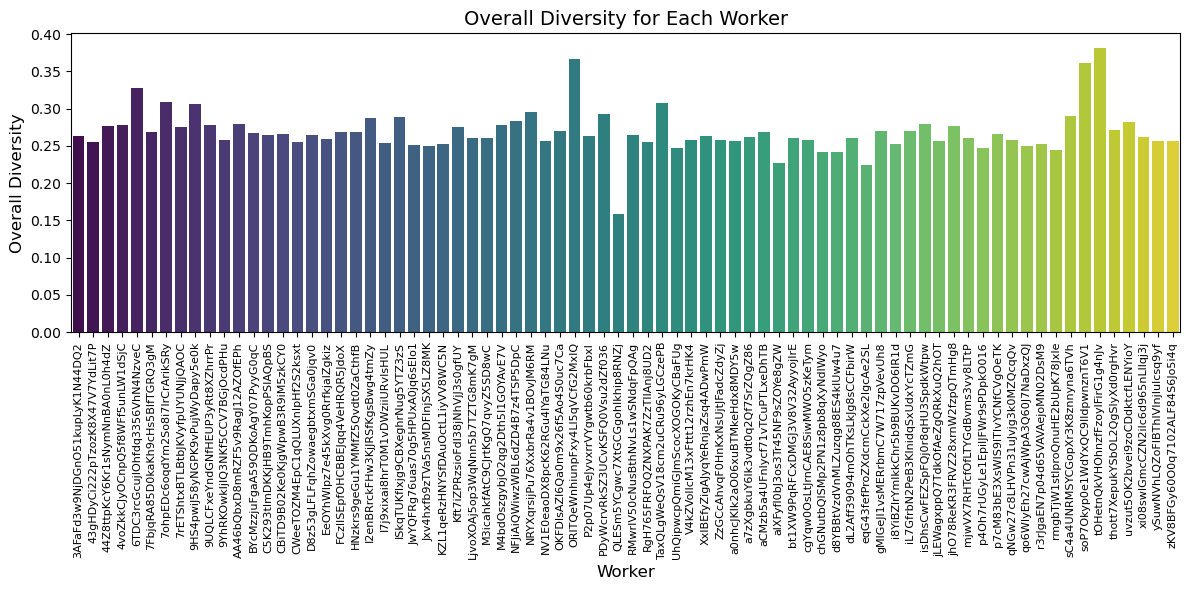

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='worker', y='overall_diversity', data=worker_diversity, palette='viridis')

# Customize plot
plt.title('Overall Diversity for Each Worker', fontsize=14)
plt.xlabel('Worker', fontsize=12)
plt.ylabel('Overall Diversity', fontsize=12)
plt.xticks(rotation=90, fontsize=8)  # Rotate worker labels for better visibility
plt.tight_layout()
plt.show()


In [125]:
# Filter rows for the specified worker
specific_worker_rows = diversity_input_df[diversity_input_df['worker'] == 'ORlTQeWnhiunpFxy4Ll5qVCfG2MxIQ']

# Display the filtered rows
print(specific_worker_rows)

                               worker    newsID1   newsID2  \
16735  ORlTQeWnhiunpFxy4Ll5qVCfG2MxIQ  t3_2dsj0f  t3_jpmai   

                                               category1  \
16735  [-0.044962097, 0.056949478, -0.029759852, 0.03...   

                                               category2  \
16735  [-0.03560139, 0.025636, -0.0025144694, 0.06742...   

                                                article1  \
16735  [0.15618427, -0.13303706, -0.11093797, -0.2385...   

                                                article2  \
16735  [0.1795757, -0.115530245, 0.11071063, -0.25827...   

       embedding_similarity  embedding_diversity  category_similarity  \
16735              0.821763             0.178237             0.352277   

       category_diversity  total_diversity  
16735            0.647723         0.366031  


In [127]:
specific_worker_rows

,worker,newsID1,newsID2,category1,category2,article1,article2,embedding_similarity,embedding_diversity,category_similarity,category_diversity,total_diversity
16735,ORlTQeWnhiunpFxy4Ll5qVCfG2MxIQ,t3_2dsj0f,t3_jpmai,"[-0.044962097, 0.056949478, -0.029759852, 0.03...","[-0.03560139, 0.025636, -0.0025144694, 0.06742...","[0.15618427, -0.13303706, -0.11093797, -0.2385...","[0.1795757, -0.115530245, 0.11071063, -0.25827...",0.821763,0.178237,0.352277,0.647723,0.366031
